In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
wine = pd.read_csv('winequality-red.csv') 

In [2]:
from sklearn.utils import shuffle
wine = shuffle(wine, random_state=42)

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 803 to 1126
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

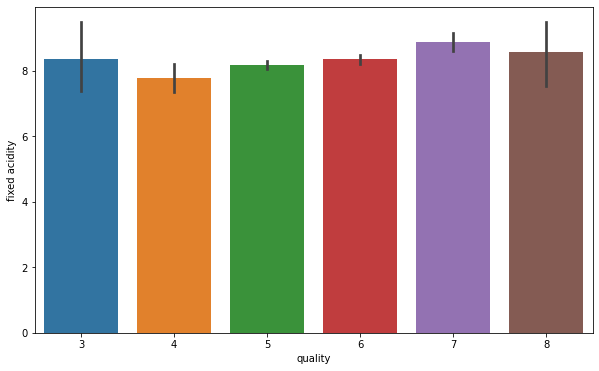

In [4]:
# fixed acidity가 quality에 분류하는 데 별 도움이 되지 않는다.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

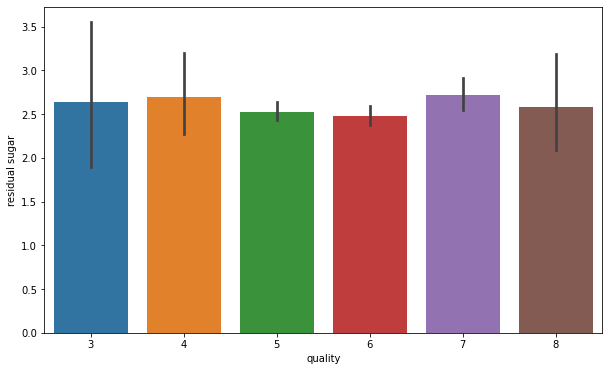

In [5]:
# residual sugar도 도움안됨
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

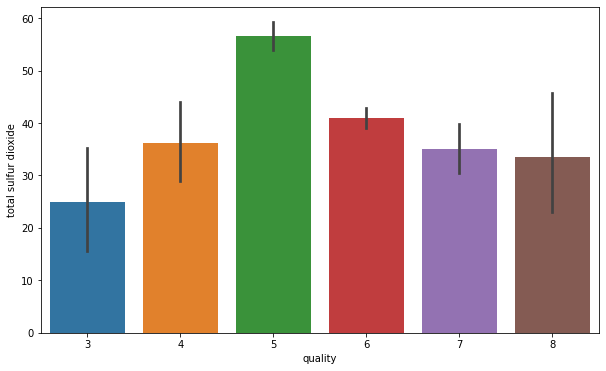

In [6]:
#도움안됨
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

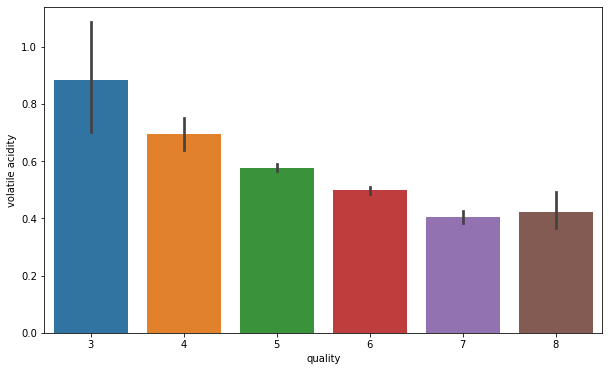

In [7]:
# volatile acidity이 낮아질수록 quality는 올라감
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

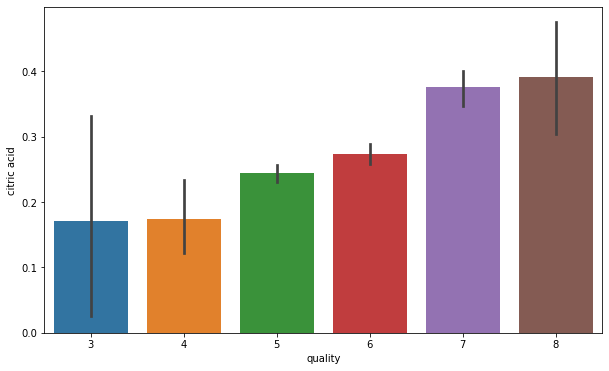

In [8]:
# citric acid(시트르산)가 높을수록 quality가 높아짐
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

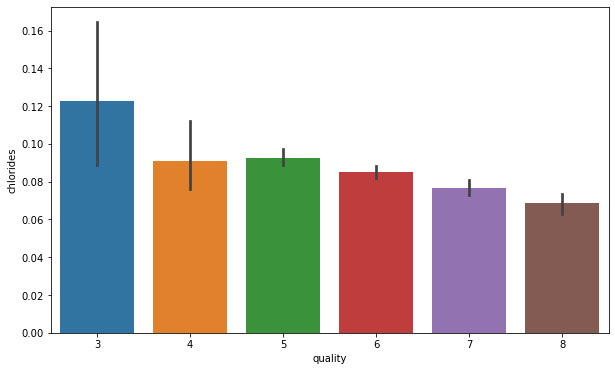

In [9]:
# chloride(시트르산)이 낮을수록 quality는 높아진다
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

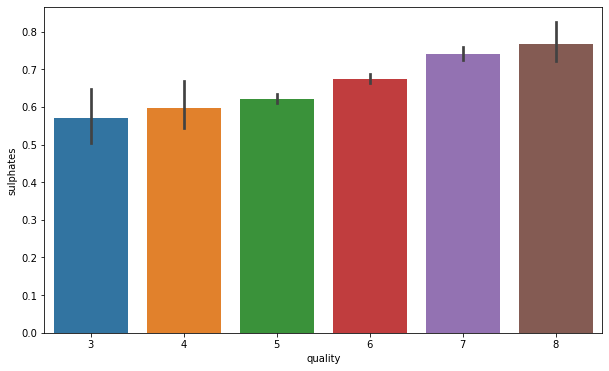

In [10]:
# sulphates이 높을수록 quality도 높아진다
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

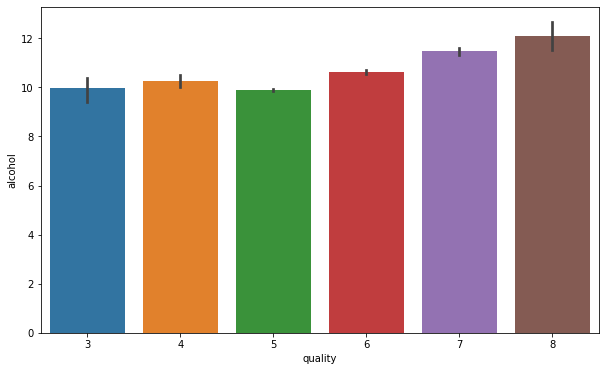

In [11]:
#Alcohol이 높아질수록 quailty도 높아졌다
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [12]:
#wine['1']=wine['fixed acidity']-wine['total sulfur dioxide']
#wine['2']=wine['fixed acidity']+wine['volatile acidity']
#wine['3']=wine['total sulfur dioxide']-wine['free sulfur dioxide']
#wine['4']=wine['alcohol']/wine['sulphates']#알콜/황산염
#wine['5']=wine['sulphates']-wine['chlorides']#황산염-염화물
#wine['6']=wine['fixed acidity']+wine['residual sugar'] #고정산도+잔류설탕

In [13]:
X_train = wine.drop((["quality","fixed acidity"]),axis = 1)
y_train = wine["quality"].copy()

In [14]:
corr_matrix=wine.corr()
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 803 to 1126
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 226.9 KB


In [15]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [16]:
# 스탠다드 스케일러 적용

sc = StandardScaler()

X_train = sc.fit_transform(X_train)


In [17]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [18]:
# 랜덤 포레스트

rfc = RandomForestRegressor(n_estimators=400, random_state=42) # 200 트리개수
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_train)

lin_scores = cross_val_score(rfc, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [0.55802904 0.54004427 0.60457501 0.54943245 0.56703533 0.61330986
 0.56022871 0.61608127 0.52745353 0.53346872]
Mean: 0.5669658182942344
Standard deviation: 0.03132933722273039


In [19]:
# sgd최적화 방법은 일부 표본 데이터만 사용한 gradient의 추정치를 이용하는 방법
sgd = SGDRegressor(penalty=None) # 정규화 조건 none
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_train)

In [20]:
lin_scores = cross_val_score(sgd, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.62053852 0.63507085 0.6800292  0.67748705 0.68289378 0.70543282
 0.64763782 0.69630697 0.55260182 0.61845306]
Mean: 0.6516451879934257
Standard deviation: 0.04416719631350687


In [21]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

xtree_reg = ExtraTreesRegressor(n_estimators=400, random_state=42,max_depth=30)
xtree_reg.fit(X_train, y_train)

xtree_scores = cross_val_score(xtree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
xtree_rmse_scores = np.sqrt(-xtree_scores)
display_scores(xtree_rmse_scores)


Scores: [0.53002041 0.52127405 0.59460218 0.53981077 0.56399444 0.58179223
 0.55100488 0.57392555 0.50920325 0.51368932]
Mean: 0.5479317079067367
Standard deviation: 0.028350720207014464


In [22]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

xtree_reg = ExtraTreesRegressor(n_estimators=400, random_state=42,max_depth=20)
xtree_reg.fit(X_train, y_train)

xtree_scores = cross_val_score(xtree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
xtree_rmse_scores = np.sqrt(-xtree_scores)
display_scores(xtree_rmse_scores)


Scores: [0.53752404 0.5228956  0.59410891 0.54693521 0.56073842 0.58266403
 0.54746094 0.57520262 0.50969082 0.50945361]
Mean: 0.5486674206067725
Standard deviation: 0.028142921746629863


In [30]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

ada_reg = AdaBoostRegressor(
   n_estimators=400, learning_rate=1.5, random_state=42)#0.5: 0.550879508062575
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=1.5, n_estimators=400, random_state=42)

In [31]:
model1 = AdaBoostRegressor(base_estimator= ExtraTreesRegressor(n_estimators=400, random_state=42,max_depth=50))
model1.fit(X_train, y_train)


AdaBoostRegressor(base_estimator=ExtraTreesRegressor(max_depth=50,
                                                     n_estimators=400,
                                                     random_state=42))

In [32]:
model1_scores = cross_val_score(model1, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
model1_rmse_scores = np.sqrt(-model1_scores)
display_scores(model1_rmse_scores)


Scores: [0.5340988  0.50973929 0.58370982 0.55030911 0.57009583 0.57120887
 0.55975783 0.58173095 0.51365221 0.52863811]
Mean: 0.5502940812154878
Standard deviation: 0.02596646805786776
